#**Integrantes**



*   Casanova, Beverly
*   Nuñez, Lourdes

*   Perez, Micaela
*   Cardozo, Pamela
*   Abal, Karen




# FRAUDES FINANCIEROS

En el presente trabajo se hace un análisis sobre un tema de gran relevancia en el mundo financiero: el fraude con tarjetas de crédito. Este fenómeno, que afecta tanto a consumidores como a instituciones financieras, ha cobrado importancia debido al aumento de las transacciones electrónicas y al uso generalizado de tarjetas de crédito.

Nuestro análisis se basa en un conjunto de datos detallado que recoge diversas transacciones con tarjetas de crédito, clasificadas según si son fraudulentas o no. Este dataset proporciona una oportunidad única para explorar los patrones y características que distinguen a las transacciones legítimas de las fraudulentas.

En esta presentación, abordaremos los siguientes puntos clave:


**1 - Descripción del Dataset:**

Origen y naturaleza del dataset.

Estructura y características de los datos.

Variables incluidas y su relevancia.


**2- Análisis Exploratorio de Datos (EDA):**

Distribución de las transacciones fraudulentas frente a las legítimas.

Análisis de las variables más significativas.

Visualización de patrones y tendencias.

**3- Métodos de Detección de Fraude:**

Técnicas de modelado utilizadas para identificar transacciones fraudulentas.

Comparación de modelos de Machine Learning aplicados.

**4- Resultados y Conclusiones:**

Eficacia de los modelos de detección de fraude.

Implicaciones de los hallazgos.

Recomendaciones para la mitigación del fraude.







# Objetivos del proyecto

El objetivo de esta presentación es no solo entender cómo y por qué ocurren los fraudes con tarjetas de crédito, sino también discutir estrategias eficaces para su detección y prevención. Al final de la presentación, estaré encantado de responder a sus preguntas y discutir en profundidad cualquier aspecto de este análisis.






    













# Origen del Dataset

**CARGAMOS LIBRERÍAS A UTILIZAR**

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**REALIZAMOS LA lECTURA DE NUESTRA BASE DE DATOS**

In [24]:
# Leemos el archivo csv
credit_card_fraud = pd.read_csv('/content/drive/My Drive/Curso Ingenias/fraud_test.csv', delimiter=',')

In [25]:
credit_card_fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


**Visualizamos el DataFrame y observamos cuantas filas y columnas tiene.**

In [26]:
credit_card_fraud.shape

(555719, 23)

**Nombre y tipo de datos en las columnas**

In [27]:
credit_card_fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [28]:
credit_card_fraud.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [29]:
credit_card_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

**Valores faltantes y ver las filas que lo tienen**

In [30]:
credit_card_fraud.isna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
credit_card_fraud.isna().sum() # la suma por cada columna

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [32]:
credit_card_fraud[credit_card_fraud.isna().any(axis=1)] #al menos 1 en alguna columna

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [33]:
credit_card_fraud[credit_card_fraud['trans_date_trans_time'].isna()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


**Mostramos los Datos Estadísticos**

In [34]:
credit_card_fraud.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [35]:
credit_card_fraud['trans_date_trans_time'].value_counts()

trans_date_trans_time
15/12/2020 21:26    16
01/12/2020 19:01    16
01/12/2020 23:34    15
22/12/2020 13:59    15
01/12/2020 15:55    15
                    ..
12/11/2020 07:58     1
12/11/2020 07:54     1
12/11/2020 07:53     1
12/11/2020 07:51     1
22/08/2020 04:11     1
Name: count, Length: 226976, dtype: int64

In [36]:
credit_card_fraud['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [37]:
credit_card_fraud['gender'].value_counts()

gender
F    304886
M    250833
Name: count, dtype: int64

In [38]:
credit_card_fraud['city_pop'].value_counts()

city_pop
606        2553
1312922    2222
1595797    2182
241        2045
1766       1982
           ... 
14462        10
837792        9
20226         9
6263          8
1071          6
Name: count, Length: 835, dtype: int64

In [39]:
credit_card_fraud['job'].value_counts()


job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [40]:
credit_card_fraud['state'].value_counts()

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64

**Vemos el número total de los valores de la columna "Fraud Flag or Label"**

In [41]:
non_null_count = credit_card_fraud['is_fraud'].count
print (non_null_count)

<bound method Series.count of 0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64>


**Eliminamos las columnas que no vamos a usar**

In [42]:
credit_card_fraud.drop(columns=['Unnamed: 0','trans_num','cc_num','merchant','first','last','street','zip','unix_time'],axis=1,inplace=True)

** Mostramos los Resultados**

In [43]:
credit_card_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   category               555719 non-null  object 
 2   amt                    555719 non-null  float64
 3   gender                 555719 non-null  object 
 4   city                   555719 non-null  object 
 5   state                  555719 non-null  object 
 6   lat                    555719 non-null  float64
 7   long                   555719 non-null  float64
 8   city_pop               555719 non-null  int64  
 9   job                    555719 non-null  object 
 10  dob                    555719 non-null  object 
 11  merch_lat              555719 non-null  float64
 12  merch_long             555719 non-null  float64
 13  is_fraud               555719 non-null  int64  
dtypes: float64(5), int64(2), object(7)
m

**Creamos un gráfico pastel que demuestra una distribución entre las transacciones fraudulentas(1) y no fraudulentas(0)
**

Text(0.5, 1.0, 'Distribución del Fraude')

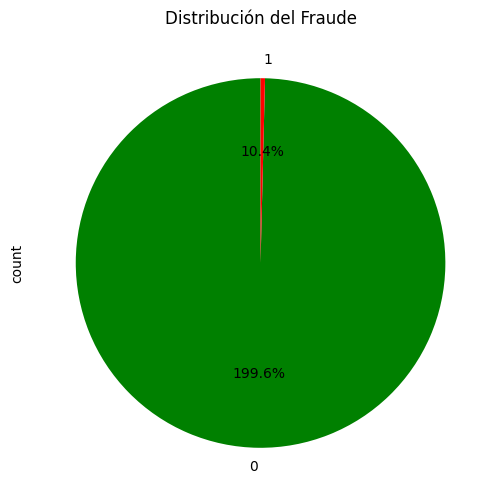

In [44]:
plt.figure(figsize=(6, 6))
credit_card_fraud['is_fraud'].value_counts().plot.pie(autopct = '1%.1f%%',colors = ['green', 'red'], startangle=90)
plt.title('Distribución del Fraude')

**Mostramos otro gráfico**

<ipython-input-45-c9535a23bd52>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index,palette='pastel')


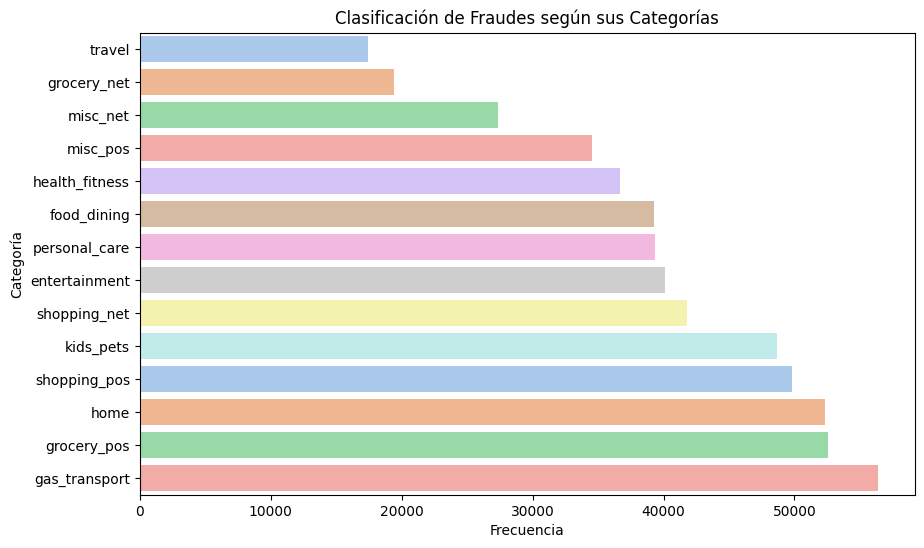

In [45]:
# Calculamos la frecuencia de cada categoría
category_counts = credit_card_fraud['category'].value_counts()

# Ordenar las categorías por frecuencia
category_counts = category_counts.sort_values(ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
sns.barplot(x=category_counts.values, y=category_counts.index,palette='pastel')

# Establecer etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Clasificación de Fraudes según sus Categorías')

# Mostrar el gráfico
plt.show()

**Gráfico para género**

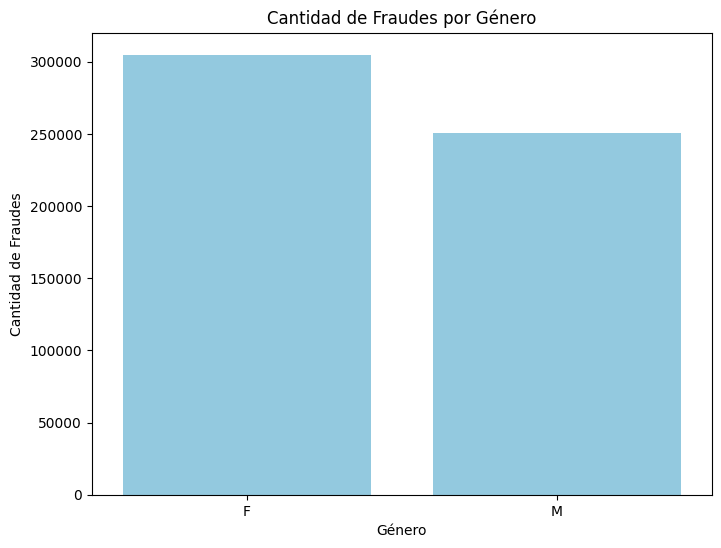

In [46]:
# Calculamos la frecuencia de fraudes por género
fraud_by_gender = credit_card_fraud['gender'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values,color='skyblue')

# Etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad de Fraudes')
plt.title('Cantidad de Fraudes por Género')

# Mostrar el gráfico
plt.show()

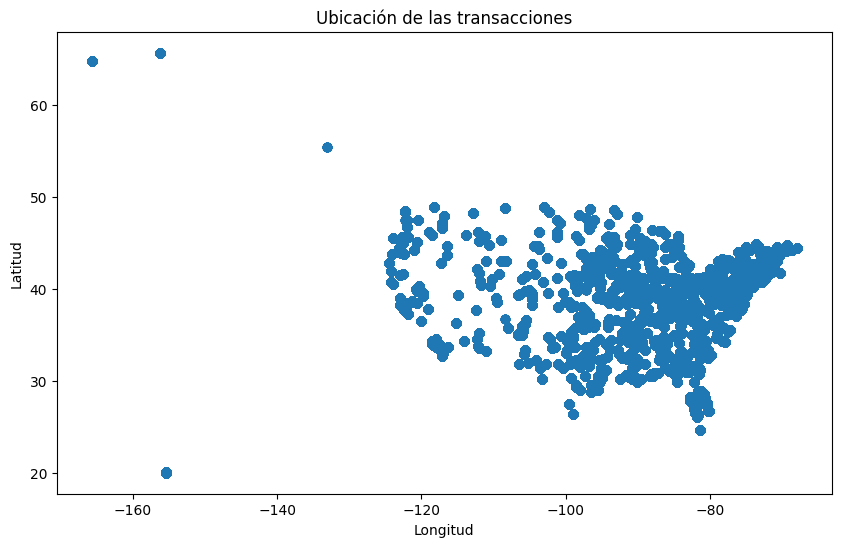

In [47]:
# Obtener las coordenadas de latitud y longitud
lat = credit_card_fraud["lat"]
lon = credit_card_fraud["long"]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(lon, lat)

# Agregar etiquetas y título
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Ubicación de las transacciones")

# Mostrar el gráfico
plt.show()

 Este código visualiza la ubicación de las transacciones de fraude con tarjeta de crédito en un gráfico de dispersión utilizando sus coordenadas geográficas.